In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
data = pd.read_excel('../stage_report/Sutton_Borough_Data.xlsx')
data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000382-01012019,01 Jan 2019,2019,07:54:10,7,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,893.0,Sutton,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
1,000553-01012019,01 Jan 2019,2019,16:49:19,16,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,437.0,Wallington,NaN,NaN,2.0,2.0,2.0,2.0,666.0,1
2,000577-01012019,01 Jan 2019,2019,18:16:05,18,Special Service,Special Service,Assist other agencies,Dwelling,House - single occupancy,...,382.0,Wallington,424.0,Croydon,2.0,2.0,2.0,4.0,1332.0,1
3,000624-01012019,01 Jan 2019,2019,21:08:28,21,Fire,Primary Fire,NaN,Outdoor Structure,Other outdoor equipment/machinery,...,364.0,Sutton,691.0,Surbiton,2.0,2.0,2.0,3.0,999.0,1
4,000730-02012019,02 Jan 2019,2019,06:10:00,6,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,...,283.0,Sutton,620.0,Wallington,2.0,2.0,2.0,1.0,333.0,1


In [22]:
data_subset = data[['Postcode_district', 'DateOfCall', 'TimeOfCall', 'IncidentGroup', 'StopCodeDescription', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PropertyCategory', 'PropertyType']]
data_subset.head()

,Postcode_district,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,NumStationsWithPumpsAttending,NumPumpsAttending,PropertyCategory,PropertyType
0,SM1,01 Jan 2019,07:54:10,Fire,Primary Fire,1.0,1.0,Non Residential,Private Garden Shed
1,SM1,01 Jan 2019,16:49:19,False Alarm,AFA,2.0,2.0,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...
2,SM6,01 Jan 2019,18:16:05,Special Service,Special Service,2.0,2.0,Dwelling,House - single occupancy
3,KT4,01 Jan 2019,21:08:28,Fire,Primary Fire,2.0,2.0,Outdoor Structure,Other outdoor equipment/machinery
4,SM1,02 Jan 2019,06:10:00,False Alarm,AFA,2.0,2.0,Dwelling,Self contained Sheltered Housing


In [23]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7301 entries, 0 to 7300
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Postcode_district              7301 non-null   object 
 1   DateOfCall                     7301 non-null   object 
 2   TimeOfCall                     7301 non-null   object 
 3   IncidentGroup                  7301 non-null   object 
 4   StopCodeDescription            7301 non-null   object 
 5   NumStationsWithPumpsAttending  7201 non-null   float64
 6   NumPumpsAttending              7201 non-null   float64
 7   PropertyCategory               7301 non-null   object 
 8   PropertyType                   7301 non-null   object 
dtypes: float64(2), object(7)
memory usage: 513.5+ KB


In [24]:
data_subset.isnull().sum()

Postcode_district                  0
DateOfCall                         0
TimeOfCall                         0
IncidentGroup                      0
StopCodeDescription                0
NumStationsWithPumpsAttending    100
NumPumpsAttending                100
PropertyCategory                   0
PropertyType                       0
dtype: int64

In [25]:
# Removing rows where 'NumStationsWithPumpsAttending' and 'NumPumpsAttending' are missing
data_subset = data_subset.dropna(subset=['NumStationsWithPumpsAttending', 'NumPumpsAttending'])

# Verify the removal of missing values
missing_values_after_removal = data_subset.isnull().sum()

# Updated info on the cleaned dataset
cleaned_info = data_subset.info()

missing_values_after_removal, cleaned_info


<class 'pandas.core.frame.DataFrame'>
Index: 7201 entries, 0 to 7300
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Postcode_district              7201 non-null   object 
 1   DateOfCall                     7201 non-null   object 
 2   TimeOfCall                     7201 non-null   object 
 3   IncidentGroup                  7201 non-null   object 
 4   StopCodeDescription            7201 non-null   object 
 5   NumStationsWithPumpsAttending  7201 non-null   float64
 6   NumPumpsAttending              7201 non-null   float64
 7   PropertyCategory               7201 non-null   object 
 8   PropertyType                   7201 non-null   object 
dtypes: float64(2), object(7)
memory usage: 562.6+ KB


(Postcode_district                0
 DateOfCall                       0
 TimeOfCall                       0
 IncidentGroup                    0
 StopCodeDescription              0
 NumStationsWithPumpsAttending    0
 NumPumpsAttending                0
 PropertyCategory                 0
 PropertyType                     0
 dtype: int64,
 None)

In [26]:
# Converting 'DateOfCall' and 'TimeOfCall' into datetime format
data_subset['DateOfCall'] = pd.to_datetime(data_subset['DateOfCall'])
data_subset['TimeOfCall'] = pd.to_datetime(data_subset['TimeOfCall'])

/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_48502/2470788935.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_subset['TimeOfCall'] = pd.to_datetime(data_subset['TimeOfCall'])


In [27]:
data_subset.dtypes

Postcode_district                        object
DateOfCall                       datetime64[ns]
TimeOfCall                       datetime64[ns]
IncidentGroup                            object
StopCodeDescription                      object
NumStationsWithPumpsAttending           float64
NumPumpsAttending                       float64
PropertyCategory                         object
PropertyType                             object
dtype: object

## Exploring IncidentGroup and StopCodeDescription

In [28]:

# Count of unique values in 'IncidentGroup'
incident_group_counts = data_subset['IncidentGroup'].value_counts()

# Count of unique values in 'StopCodeDescription'
stop_code_description_counts = data_subset['StopCodeDescription'].value_counts()

incident_group_counts, stop_code_description_counts


(IncidentGroup
 False Alarm        3809
 Special Service    2055
 Fire               1337
 Name: count, dtype: int64,
 StopCodeDescription
 AFA                                      2951
 Special Service                          2054
 False alarm - Good intent                 773
 Primary Fire                              685
 Secondary Fire                            650
 False alarm - Malicious                    85
 Chimney Fire                                2
 Flood call attended - Batch mobilised       1
 Name: count, dtype: int64)

In [29]:
# Aggregating incidents by 'Postcode_district' and 'IncidentGroup'
incident_counts_by_postcode = data_subset.groupby(['Postcode_district', 'IncidentGroup']).size().unstack(fill_value=0)

# Calculating total incidents for each 'Postcode_district'
incident_counts_by_postcode['Total Incidents'] = incident_counts_by_postcode.sum(axis=1)

# Sorting by total incidents to see the areas with the highest number of incidents
incident_counts_by_postcode_sorted = incident_counts_by_postcode.sort_values(by='Total Incidents', ascending=False)

incident_counts_by_postcode_sorted


IncidentGroup,False Alarm,Fire,Special Service,Total Incidents
Postcode_district,,,,
SM1,1053,342,563,1958
SM6,733,251,444,1428
SM5,622,284,370,1276
SM2,506,115,246,867
SM3,357,114,176,647
CR0,198,56,63,317
KT4,159,59,87,305
SM4,53,51,31,135
CR4,32,44,42,118


In [30]:
# Summarizing the number of incidents by 'PropertyCategory'
property_category_counts = data_subset['PropertyCategory'].value_counts()

# Further breaking down by 'PropertyType' within each 'PropertyCategory'
property_type_counts = data_subset.groupby(['PropertyCategory', 'PropertyType']).size().unstack(fill_value=0)

property_category_counts, property_type_counts


(PropertyCategory
 Dwelling             3646
 Non Residential      1598
 Outdoor               697
 Road Vehicle          645
 Outdoor Structure     352
 Other Residential     262
 Rail Vehicle            1
 Name: count, dtype: int64,
 PropertyType       Animal harm outdoors  Animal products processing plant  \
 PropertyCategory                                                            
 Dwelling                              0                                 0   
 Non Residential                       0                                 1   
 Other Residential                     0                                 0   
 Outdoor                               2                                 0   
 Outdoor Structure                     0                                 0   
 Rail Vehicle                          0                                 0   
 Road Vehicle                          0                                 0   
 
 PropertyType       Bank/Building Society   Barbecue  Bingo H

In [31]:
data_subset.dtypes

Postcode_district                        object
DateOfCall                       datetime64[ns]
TimeOfCall                       datetime64[ns]
IncidentGroup                            object
StopCodeDescription                      object
NumStationsWithPumpsAttending           float64
NumPumpsAttending                       float64
PropertyCategory                         object
PropertyType                             object
dtype: object

# Handling Categorical Variables
## Splitting the dataset into training and testing sets

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecting relevant features and target variable
X = data_subset[['Postcode_district', 'PropertyCategory']]
y = data_subset['IncidentGroup'].apply(lambda x: 1 if x == 'False Alarm' else 0)

# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Modeling

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.44      0.57       654
           1       0.66      0.91      0.77       787

    accuracy                           0.70      1441
   macro avg       0.73      0.68      0.67      1441
weighted avg       0.73      0.70      0.68      1441



# Modeling 

## Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluation
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57       654
           1       0.66      0.91      0.76       787

    accuracy                           0.70      1441
   macro avg       0.73      0.67      0.67      1441
weighted avg       0.72      0.70      0.68      1441



# Descriptive Modeling

## Data Preprocessing

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
# X_encoded from the predictive modeling
X_scaled = scaler.fit_transform(X_encoded)


# K-Means Clustering

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

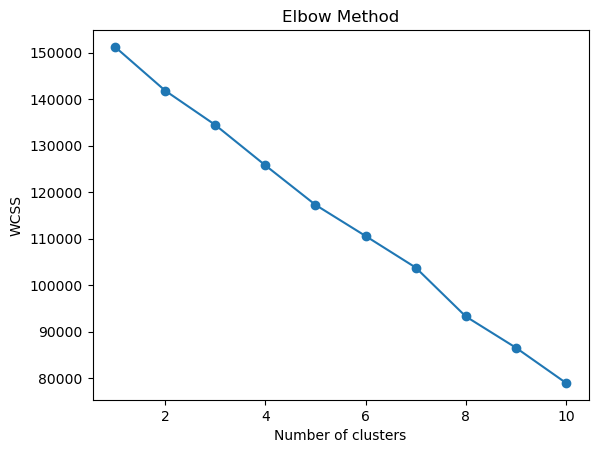

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


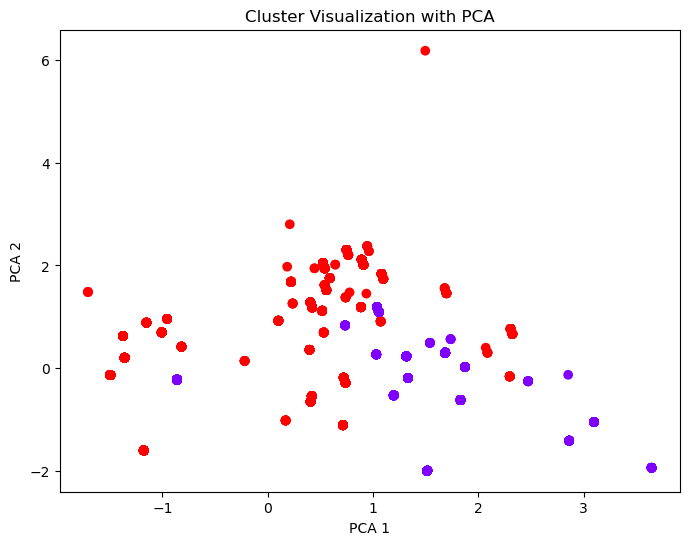

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster Visualization with PCA')
plt.show()

# Applying Hierarchical Clustering

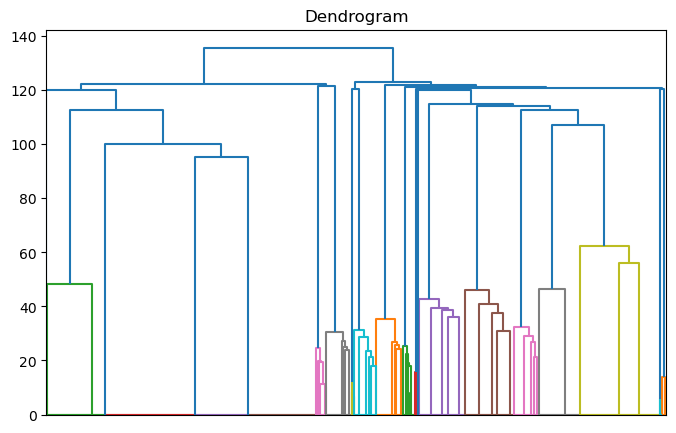

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generating the linkage matrix
Z = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(8, 5))
plt.title('Dendrogram')
dendrogram(Z, no_labels=True)
plt.show()
